# Section 3

3. Import Libraries  
• Create a code block to import the following libraries: 
o numpy as np 
o pandas as pd  
o matplotlib.pyplot as plt 
o statsmodels 
o statsmodels.api as sm 
o seaborn as sns 
o Set the plt.style.use to ‘seaborn’

In [1]:
#CodeBlock Section 3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import seaborn as sns

plt.style.use('seaborn')
pd.set_option('display.max_rows', 100)

# Section 4-1
• Create a code block to import ‘Real Estate Data – Week 5.csv’ as df_realestate  with 
index_col = 0 and header=0. (Note, the path should be similar ‘data/Real Estate 
Data – Week 5.csv’.)

In [2]:
# CodeBlock Section 4-1
df_realestate = pd.read_csv('data/Real Estate Data - Week 5.csv', index_col = 0, header = 0 )

# Section 4-2

• Create a code block and execute to view the .info() for df_realestate.

In [47]:
# CodeBlock Section 4-2
df_realestate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Dwelling Type                  1387 non-null   object 
 1   Lot Frontage                   1387 non-null   int64  
 2   Lot Area                       1387 non-null   int64  
 3   Land Contour                   1387 non-null   object 
 4   Neighborhood                   1387 non-null   object 
 5   Location Condition             1387 non-null   object 
 6   Overall Quality                1387 non-null   int64  
 7   Overall Cond                   1387 non-null   int64  
 8   Year Built                     1387 non-null   int64  
 9   Masonry/Veneer Area            1387 non-null   int64  
 10  Basement Finished Area         1387 non-null   int64  
 11  Basement Unfinished Area       1387 non-null   int64  
 12  1st Floor Area                 1387 non-null   i

# CodeBlock Section 4-3
Explanation of the Results  
• Give a brief explanation of the variables.  
This data set describes characteristics of homes; for example,full bathrooms, half bathrooms, pool, baths per bedroom and sale price. 

It's hard to analyze the variables that are not numeric because regression models require numeric variables. In order to do an analysis of the variables and the anticipated effect of the target variable. We should stick to quantitative int data types to measure in multi-regression stat models or convert the object variables to int. For example, kitchen qual has values such as good or excellent. This can't be measured in regression models.  

Which variables do you see that must be either dropped or encoded? 

I would recommend encoding all of the object data types since those don’t have quantitative values. Examples would be:
Dwelling Type, Land Contour, Neighborhood, Location Condition, Kitchen Qual, Garage Finish and Sale Condition.

I would move forward with variables that are either an Int or float data type. 

Why do you think these variables fit this criterion?
These variables are associated with describing the characteristics of a home and might have bearing predicting the target variable such as the sale price.  


# Section 5a1

• Create a code block to create X and y by including the quantitative features that 
were used in HW04 for X and ‘Sale Price’ for y.  
• X should include: 
o 'Lot Frontage', 'Lot Area', 'Overall Quality', 'Overall Cond', 'Masonry/Veneer 
Area', 'Basement Finished Area', 'Basement Unfinished Area', '1st Floor 
Area', '2nd Floor Area', 'Bedrooms Above Grade', 'Total Rooms Above 
Grade', 'Fireplaces', 'Garage Cars', 'Porch Area', 'Full Bathrooms', 'Half 
Bathrooms', 'Extra Kitchens', 'Baths per Bedroom' 
• y should include: 
o ‘Sale Price’ 

In [4]:
# CodeBlock Section 5a1
X = df_realestate[['Lot Frontage','Lot Area', 'Overall Quality', 'Overall Cond', 'Masonry/Veneer Area', 'Basement Finished Area', 'Basement Unfinished Area', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', 'Total Rooms Above Grade', 'Fireplaces', 'Garage Cars', 'Porch Area', 'Full Bathrooms', 'Half Bathrooms', 'Extra Kitchens', 'Baths per Bedroom']]
y = df_realestate['Sale Price']

# Section 5a2

• Create a code block and execute a multiple regression using statsmodels. Make 
sure to include the following: 
o Add a constant 
o Use y and X to fit the model and name the model reg. 
o Use X to predict with the model and name it pred. 
o Use the model (reg) to create the residuals and name it resid. 
o Show a summary of the results.

In [5]:
# CodeBlock Section 5a2
X = df_realestate[['Lot Frontage','Lot Area', 'Overall Quality', 'Overall Cond', 'Masonry/Veneer Area', 'Basement Finished Area', 'Basement Unfinished Area', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade', 'Total Rooms Above Grade', 'Fireplaces', 'Garage Cars', 'Porch Area', 'Full Bathrooms', 'Half Bathrooms', 'Extra Kitchens','Baths per Bedroom']]
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     455.6
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:18:05   Log-Likelihood:                -16115.
No. Observations:                1387   AIC:                         3.227e+04
Df Residuals:                    1368   BIC:                         3.237e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -9.975e+04   7299.265    -13.666      0.000   -1.14e+05   -8.54e+04
Lot Frontage                85.6777     22.383      3.828      0.000      41.770     129.585
Lot Area                     0.5257      0.078      6.697      0.000       0.372       0.680
Overall Quality           1.856e+04    879.786     21.101      0.000    1.68e+04    2.03e+04
Overall Cond              3034.0501    702.252      4.320      0.000    1656.443    4411.657
Masonry/Veneer Area         22.7251      4.745      4.789      0.000      13.417      32.033
Basement Finished Area      34.1988      3.195     10.704      0.000      27.931      40.466
Basement Unfinished Area    18.0606      2.935      6.153      0.000      12.303      23.819
1st Floor Area              28.0322      2.132     13.150      0.000      23.851      32.214
2nd Floor Area              21.9259      1.824     12.019      0.000      18.347      25.505
Bedrooms Above Grade     -4800.9598    881.055     -5.449      0.000   -6529.326   -3072.594
1st Floor Area              28.0322      2.132     13.150      0.000      23.851      32.214
2nd Floor Area              21.9259      1.824     12.019      0.000      18.347      25.505
Bedrooms Above Grade     -4800.9598    881.055     -5.449      0.000   -6529.326   -3072.594
Total Rooms Above Grade   2800.2162    989.502      2.830      0.005     859.111    4741.321
Fireplaces                 615.9098   1374.671      0.448      0.654   -2080.783    3312.602
Garage Cars               1.187e+04   1384.520      8.576      0.000    9157.516    1.46e+04
Porch Area                  19.6883      5.198      3.787      0.000       9.491      29.886
Full Bathrooms            8211.0878   2084.296      3.940      0.000    4122.326    1.23e+04
Half Bathrooms            4233.6917   1686.593      2.510      0.012     925.104    7542.280
Extra Kitchens           -3.023e+04   3907.663     -7.737      0.000   -3.79e+04   -2.26e+04
Baths per Bedroom        -1416.6686   4099.113     -0.346      0.730   -9457.896    6624.559
==============================================================================
Omnibus:                      112.144   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              402.851
Skew:                           0.331   Prob(JB):                     3.33e-88
Kurtosis:                       5.556   Cond. No.                     2.51e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.64e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Section 6a1

• Create a code block and to show a groupby based on Land Contour 
o Group based on Land Contour 
o Show only one column (you can choose any, but when creating a count, it is 
best to select the same variable that you are grouping by because of the 
possibility of null values from other variables, therefore select [‘Land 
Contour’] as the variable to do a count. 
o You are doing a count and sorting the values where ascending equals False. 
o NOTE: you can also do a value_counts instead of a groupby and it will 
give you the same result.  (Your choice!) 
 


In [6]:
# CodeBlock Section 6a1

df_realestate['Land Contour'].value_counts()

Level         1248
Banked          57
Hillside        48
Depression      34
Name: Land Contour, dtype: int64

# Section 6a2

• Create a code block to create the dummy variables for ‘Land Contour’ and name 
the dummy variables DataFrame dummies_lc. (Video: C1.S9.Py01: One-hot 
encoding the verified income category)  
o Below are the properties to set: 
• prefix = ‘lc’ 
• drop_first = False 
• dtype=’int’

In [7]:
# CodeBlock Section 6a2
#creating a copy of original dataframe
df_dummy = df_realestate.copy()

In [8]:
# CodeBlock Section 6a2
dummies_lc = pd.get_dummies(df_dummy['Land Contour'], drop_first = False, prefix = 'lc', dtype = 'int')



# Section 6a3

• Create a code block to view a sample of dummies_lc 
o dummies_lc.sample(15, random_state=42)

In [9]:
# CodeBlock Section 6a3
dummies_lc.sample(15, random_state=42)

,lc_Banked,lc_Depression,lc_Hillside,lc_Level
Id,,,,
685,0,0,0,1
219,0,0,0,1
996,0,0,0,1
716,0,0,0,1
846,0,0,0,1
251,0,0,0,1
909,0,1,0,0
555,0,0,0,1
761,0,0,0,1


• Create a code block to drop ‘lc_Level’ from dummies_lc.

In [10]:
# CodeBlock Section 6a4
dummies_lc = dummies_lc.drop(['lc_Level'], axis=1)


# Section 6a4

• Create a code block and to show a groupby or value_count for Dwelling Type.

In [11]:
# CodeBlock Section 6b1
df_realestate['Dwelling Type'].value_counts()

1-STORY 1946 & NEWER    527
2-STORY 1946 & NEWER    290
1-1/2 STORY ALL AGES    138
1-STORY PUD              87
2-STORY PUD              63
1-STORY 1945 & OLDER     62
2-STORY 1945 & OLDER     58
SPLIT OR MULTI-LEVEL     57
DUPLEX                   44
2 FAMILY CONVERSION      27
SPLIT FOYER              20
2-1/2 STORY ALL AGES     14
Name: Dwelling Type, dtype: int64

# Section 6b2

• Create a code block to create the dummy variables for Dwelling Type and name the 
dummy variables DataFrame dummies_dt.  
o Below are the properties to set: 
• prefix = ‘dt’ 
• drop_first = False 
• dtype=’int’ 

In [12]:
# CodeBlock Section 6b2
dummies_dt = pd.get_dummies(df_dummy['Dwelling Type'], drop_first = False, prefix = 'dt', dtype = 'int')



# Section 6b2

• Create a code block to drop the highest value count within dummies_dt. 

In [13]:
# CodeBlock Section 6b2
# dropping dt_1-STORY 1946 & NEWER since it's the highest value of 527.

dummies_dt = dummies_dt.drop(['dt_1-STORY 1946 & NEWER'], axis=1)
dummies_dt.head()

,dt_1-1/2 STORY ALL AGES,dt_1-STORY 1945 & OLDER,dt_1-STORY PUD,dt_2 FAMILY CONVERSION,dt_2-1/2 STORY ALL AGES,dt_2-STORY 1945 & OLDER,dt_2-STORY 1946 & NEWER,dt_2-STORY PUD,dt_DUPLEX,dt_SPLIT FOYER,dt_SPLIT OR MULTI-LEVEL
Id,,,,,,,,,,,
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0


# Section 6c1

• Create a code block and to show a groupby or value_count for Neighborhood. 

In [14]:
# CodeBlock Section 6c1

df_realestate['Neighborhood'].value_counts()

North Ames                    214
College Creek                 150
Old Town                      101
Edwards                        87
Somerset                       86
Gilbert                        79
Sawyer                         74
Northridge Heights             74
Northwest Ames                 73
Sawyer West                    58
Crawford                       50
Brookside                      49
Mitchell                       46
Northridge                     38
Timberland                     36
Iowa DOT and Rail Road         34
Clear Creek                    27
South & West of Iowa State     24
Stone Brook                    22
Bloomington Heights            17
Briardale                      16
Veenker                        11
Meadow Village                 10
Northpark Villa                 9
Bluestem                        2
Name: Neighborhood, dtype: int64

# Section 6b2

• Create a code block to create the dummy variables for Neighborhood and name 
the dummy variables DataFrame dummies_nh.  
o Below are the properties to set: 
• prefix = ‘nh’ 
• drop_first = False 
• dtype=’int’

In [15]:
# CodeBlock Section 6b2
dummies_nh = pd.get_dummies(df_dummy['Neighborhood'], drop_first = False, prefix = 'nh', dtype = 'int')



# Section 6b3

• Create a code block to drop the highest value count within dummies_nh.

In [16]:
# CodeBlock Section 6b3
dummies_nh = dummies_nh.drop(['nh_North Ames'], axis=1)
dummies_nh.head()

,nh_Bloomington Heights,nh_Bluestem,nh_Briardale,nh_Brookside,nh_Clear Creek,nh_College Creek,nh_Crawford,nh_Edwards,nh_Gilbert,nh_Iowa DOT and Rail Road,...,nh_Northridge Heights,nh_Northwest Ames,nh_Old Town,nh_Sawyer,nh_Sawyer West,nh_Somerset,nh_South & West of Iowa State,nh_Stone Brook,nh_Timberland,nh_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Section 6d1

• Create a code block and to show a groupby or value_count for Location Condition.

In [17]:
# CodeBlock Section 6d1

df_realestate['Location Condition'].value_counts()

Normal                  1200
Adjacent Feeder St        72
Adjacent Arterial St      43
Adjacent Railroad         37
Near Pos Feature          18
Near Railroad              9
Adjacent Pos Feature       8
Name: Location Condition, dtype: int64

# Section 6d2

• Create a code block to create the dummy variables for Location Condition and 
name the dummy variables DataFrame dummies_locc.  
o Below are the properties to set: 
• prefix = ‘locc’ 
• drop_first = False 
• dtype=’int’ 

In [18]:
# CodeBlock Section 6d2
dummies_locc = pd.get_dummies(df_dummy['Location Condition'], drop_first = False, prefix = 'locc', dtype = 'int')



# Section 6d3

• Create a code block to drop the highest value count within dummies_locc.

In [19]:
# CodeBlock Section 6d3
dummies_locc = dummies_locc.drop(['locc_Normal'], axis=1)
dummies_locc.head()

,locc_Adjacent Arterial St,locc_Adjacent Feeder St,locc_Adjacent Pos Feature,locc_Adjacent Railroad,locc_Near Pos Feature,locc_Near Railroad
Id,,,,,,
1,0,0,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0


# Section 6e1

• Create a code block and to show a groupby or value_count for Garage Finish.

In [20]:
# CodeBlock Section 6e1
df_realestate['Garage Finish'].value_counts()

Unfinished        570
Rough Finished    418
Finished          336
No Garage          63
Name: Garage Finish, dtype: int64

# Section 6e2

• Create a code block to create the dummy variables for Garage Finish and name the 
dummy variables DataFrame dummies_gf.  
o Below are the properties to set: 
• prefix = ‘gf’ 
• drop_first = False 
• dtype=’int’ 

In [21]:
# CodeBlock Section 6e2
dummies_gf = pd.get_dummies(df_dummy['Garage Finish'], drop_first = False, prefix = 'gf', dtype = 'int')



# Section 6e3

• Create a code block to drop the ‘gf_No Garage’ within dummies_gf.  
(Changed 9/24) 

In [22]:
# CodeBlock Section 6e3
dummies_gf = dummies_gf.drop(['gf_No Garage'], axis=1)
dummies_gf.head()

,gf_Finished,gf_Rough Finished,gf_Unfinished
Id,,,
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1
5,0,1,0


# Section 6f1

• Create a code block and to show a groupby or value_count for Sale Condition. 

In [23]:
# CodeBlock Section 6f1
df_realestate['Sale Condition'].value_counts()

Normal Sale                                                                                   1146
Home was not completed when last assessed (associated with New Homes)                          118
Abnormal Sale -  trade, foreclosure, short sale                                                 92
Sale between family members                                                                     20
Allocation - two linked properties with separate deeds, typically condo with a garage unit      11
Name: Sale Condition, dtype: int64

# Section 6f2

• Create a code block to create the dummy variables for Sale Condition and name 
the dummy variables DataFrame dummies_sc.  
o Below are the properties to set: 
• prefix = ‘sc’ 
• drop_first = False 
• dtype=’int’ 

In [24]:
# CodeBlock Section 6f2
dummies_sc = pd.get_dummies(df_dummy['Sale Condition'], drop_first = False, prefix = 'sc', dtype = 'int')



# Section 6f3

• Create a code block to drop the highest value count within dummies_sc.

In [25]:
# CodeBlock Section 6f3
dummies_sc = dummies_sc.drop(['sc_Normal Sale'], axis=1)
dummies_sc.head()

,"sc_Abnormal Sale - trade, foreclosure, short sale","sc_Allocation - two linked properties with separate deeds, typically condo with a garage unit",sc_Home was not completed when last assessed (associated with New Homes),sc_Sale between family members
Id,,,,
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,1,0,0,0
5,0,0,0,0


# Section 6f4

• Create a code block to view the column names.

In [26]:
# CodeBlock Section 6f4
dummies_sc.columns

Index(['sc_Abnormal Sale -  trade, foreclosure, short sale',
       'sc_Allocation - two linked properties with separate deeds, typically condo with a garage unit',
       'sc_Home was not completed when last assessed (associated with New Homes)',
       'sc_Sale between family members'],
      dtype='object')

# Section 6f5

• Create a code block to rename the columns for dummies_sc (See Table 1). 
 
Table 1: Original and New Column Names for dummies_sc 
Original Column Name New Column Name 
sc_Abnormal Sale -  trade, foreclosure, short sale sc_Abnormal Sale 
sc_Allocation - two linked properties with separate 
deeds, typically condo with a garage unit 
sc_Allocation 
sc_Home was not completed when last assessed 
(associated with New Homes) 
sc_Home not complete 
sc_Sale between family members sc_Sale within Family 


In [27]:
# CodeBlock Section 6f5
dummies_sc = dummies_sc.rename(columns = {'sc_Abnormal Sale -  trade, foreclosure, short sale':'sc_Abnormal Sale', \
                                               'sc_Allocation - two linked properties with separate deeds, typically condo with a garage unit': 'sc_Allocation',\
                                         'sc_Home was not completed when last assessed (associated with New Homes)': 'sc_Home not complete',\
                                         'sc_Sale between family members': 'sc_Sale within Family'})

In [28]:
# CodeBlock Section 6f5
# checking column headings
dummies_sc.head()

,sc_Abnormal Sale,sc_Allocation,sc_Home not complete,sc_Sale within Family
Id,,,,
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,1,0,0,0
5,0,0,0,0


# Section 6g1

• Create a code block to import Label Encoder from sklearn. 
o from sklearn.preprocessing import LabelEncoder 
o lc = LabelEncoder()

In [29]:
# CodeBlock Section 6g1
from sklearn.preprocessing import LabelEncoder 
lc = LabelEncoder()

# Section 6g2

• Create a code block and to show a groupby or value_count for Pool. (Notice there 
are only 5 homes where Pool is Yes.)

In [30]:
# CodeBlock Section 6g2

df_realestate['Pool'].value_counts()

No     1382
Yes       5
Name: Pool, dtype: int64

# Section 6g3 
• Create a code block to encode the values for Pool from No to 0 and Yes to 1 using 
lc.fit_transform (Video - C1.S9.Py03: Combining multiple categories of verified 
income and using label encoding)

# # Section 6g4
Create a code block and to show a groupby or value_count for Pool. (Notice there 
are only 5 homes where Pool is 1.) 

In [31]:
# CodeBlock Section 6g3 and 6g4
df_realestate = df_realestate.replace({'No': 0, 'Yes': 1})
df_realestate['Pool'].value_counts()

0    1382
1       5
Name: Pool, dtype: int64

# Section 7a1

• You should have created the following DataFrames using one-hot encoding. 
o dummies_lc 
o dummies_nh 
o dummies_locc 
o dummies_gf 
o dummies_sc 
• Now it is time to join these DataFrames with df_realestate.

In [32]:
# CodeBlock Section 7a1
df_realestate = pd.concat([df_realestate, dummies_lc,dummies_nh,dummies_locc,dummies_gf,dummies_sc, dummies_dt], axis = 1)


# Section 7b1

• Create a code block to create X and y by including the quantitative features and the 
new dummy variables and ‘Sale Price’ for y.  
• X should include: 
o 'Lot Frontage', 'Lot Area', 'Overall Quality', 'Overall Cond', 'Masonry/Veneer 
Area', 'Basement Finished Area', 'Basement Unfinished Area', '1st Floor 
Area', '2nd Floor Area', 'Bedrooms Above Grade', 'Total Rooms Above 
Grade', 'Fireplaces', 'Garage Cars', 'Porch Area', 'Full Bathrooms', 'Half 
Bathrooms', 'Extra Kitchens', 'Baths per Bedroom' 
o Also include ‘Pool’ and all of the features from the five dummies 
DataFrames. 
o You should have a total of 70 features for X. (You can see this be doing a 
.info() for X.) 
• y should include: 
o ‘Sale Price’ 

In [33]:
# CodeBlock Section 7b1

X = df_realestate
X = X.drop(['Sale Price', 'Dwelling Type', 'Land Contour', 'Neighborhood', 'Location Condition', 'Kitchen Qual', 'Garage Finish', 'Sale Condition', ], axis=1)
y = df_realestate['Sale Price']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 1 to 1460
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Lot Frontage                   1387 non-null   int64  
 1   Lot Area                       1387 non-null   int64  
 2   Overall Quality                1387 non-null   int64  
 3   Overall Cond                   1387 non-null   int64  
 4   Year Built                     1387 non-null   int64  
 5   Masonry/Veneer Area            1387 non-null   int64  
 6   Basement Finished Area         1387 non-null   int64  
 7   Basement Unfinished Area       1387 non-null   int64  
 8   1st Floor Area                 1387 non-null   int64  
 9   2nd Floor Area                 1387 non-null   int64  
 10  Bedrooms Above Grade           1387 non-null   int64  
 11  Total Rooms Above Grade        1387 non-null   int64  
 12  Fireplaces                     1387 non-null   i

# Section 7b2

• Create a code block and execute a multiple regression using statsmodels. Make 
sure to include the following: 
o Add a constant 
o Use y and X to fit the model and name the model reg. 
o Use X to predict with the model and name it pred. 
o Use the model (reg) to create the residuals and name it resid. 
o Show a summary of the results.

In [34]:
# CodeBlock Section 7b2
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     189.2
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:18:05   Log-Likelihood:                -15788.
No. Observations:                1387   AIC:                         3.172e+04
Df Residuals:                    1315   BIC:                         3.210e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -8.432e+05   1.22e+05     -6.931      0.000   -1.08e+06   -6.05e+05
Lot Frontage                     15.6448     19.598      0.798      0.425     -22.802      54.092
Lot Area                          0.4820      0.073      6.566      0.000       0.338       0.626
Overall Quality                1.146e+04    857.184     13.365      0.000    9774.821    1.31e+04
Overall Cond                   5906.4152    642.360      9.195      0.000    4646.253    7166.577
Year Built                      406.0919     62.053      6.544      0.000     284.358     527.826
Masonry/Veneer Area              13.0641      4.230      3.089      0.002       4.766      21.362
Basement Finished Area           25.8290      2.711      9.527      0.000      20.510      31.148
Basement Unfinished Area          7.2734      2.558      2.844      0.005       2.256      12.291
1st Floor Area                   62.3042      3.828     16.275      0.000      54.794      69.814
2nd Floor Area                   54.4434      4.215     12.917      0.000      46.175      62.712
Bedrooms Above Grade          -6708.6393   1514.939     -4.428      0.000   -9680.600   -3736.679
Total Rooms Above Grade        1347.5384    850.509      1.584      0.113    -320.965    3016.042
Fireplaces                     2023.6051   1195.580      1.693      0.091    -321.847    4369.057
Garage Cars                    9263.1108   1459.925      6.345      0.000    6399.075    1.21e+04
Porch Area                       24.0595      4.407      5.460      0.000      15.414      32.705
Full Bathrooms                 3460.5039   1838.674      1.882      0.060    -146.550    7067.558
Half Bathrooms                 2078.4193   1529.943      1.358      0.175    -922.975    5079.814
Pool                           1.561e+04   1.03e+04      1.514      0.130   -4617.142    3.58e+04
Extra Kitchens                -1.786e+04   5120.644     -3.488      0.001   -2.79e+04   -7817.546
Baths per Bedroom                57.4199   3631.564      0.016      0.987   -7066.872    7181.712
lc_Banked                     -2021.6308   3288.433     -0.615      0.539   -8472.779    4429.518
lc_Depression                  1841.6016   4508.949      0.408      0.683   -7003.918    1.07e+04
lc_Hillside                    1.163e+04   3556.243      3.270      0.001    4654.093    1.86e+04
nh_Bloomington Heights         2589.7937   6860.763      0.377      0.706   -1.09e+04     1.6e+04
nh_Bluestem                    1.001e+04   1.63e+04      0.616      0.538   -2.19e+04    4.19e+04
nh_Briardale                   1.265e+04   7195.171      1.758      0.079   -1468.004    2.68e+04
nh_Brookside                   1.145e+04   4263.694      2.686      0.007    3088.877    1.98e+04
nh_Clear Creek                 4682.2561   52

# CodeBlock Section 7b3
• After running the multiple regression, give some insight into what you see and what you 
should do next.  

After combining the columns from the dummy data frames for the X dataset, we have a total of 71 feature variables. 
The Target variable is sale price. The feature variables and their p values are:
Lot Frontage (0.425), Lot Area (0.000) , Overall Quality (0.000) , Overall Cond (0.000), Year Built (0.000), Masonry/Veneer Area (0.002) , Basement Finished Area (0.000), Basement Unfinished Area (0.005), 1st Floor Area (0.000), 2nd Floor Area (0.000), bedrooms above grade (0.000) , total rooms above grade (0.113), fireplaces (0.091), porch area(0.000), full bathrooms (0.060), half bathrooms (0.175), pool (0.130), extra kitchens (0.001), baths per bedroom (0.987), ic_Banked (0.539), ic_depression(0.683), ic_Hillside (0.001), nh_bloomington Heights (0.706), nh_Bluestem (0.538), nh_briardale (0.079), nh_brookdside (0.007), nh_clear creek(0.369), nh_college creek (0.369), nh_crawford (0.000), nh_Edwards (0.696), nh_gilbert (0.365), nh_lowa dot and rail road (0.715), nh_meadow village (0.152), nh_mitchell (0.102), nh_northpark villa (0.058), nh_northridge (0.000), nh_northridge heights (0.000), nh_northwest ames (0.002), nh_old town (0.510), nh_sawyer (0.917), nh_sawyer west (0.757), nh_somerset (0.000),  nh_south & west of iowa state (0.414), nh_stone brooke (0.000), nh_timberland (0.938), nh_veenker (0.000), locc_adjacent arterial st (0.026), locc_adjacent feeder st (0.002), locc_adjacent pos feature (0.284), locc_Near  Railroad (0.662), gf_finished (0.015), gf_rough finished (0.000), gf_unfinished (0.000), sc_abnormal sale (0.001), sc_allocation (0.536), sc_home ot complete (0.000), sc_sale within family (0.094),  dt1-1/2 storry all ages (0.262),  dt_1-story 1945 & older (0.892), dt_1-story pud (0.000), dt_duplex (0.080), dt_split foyer (0.790), and dt_split or multi-level (0.337).

All feature variables that have a p value greater than 0.050 are not significant. Feature variables with a p value below 0.050 are significant. 

The R squared is 0.911 and the adjusted R square is 0.906. Since both of them are above 0.50, we can assume the model is significant.
The next steps to take would be to remove the variables with p values that are not significant in order to get a more accurate multi regression model. 

Is the model significant?  
Yes, the R squared is 0.911 and the adjusted R square is 0.906. 

Do you think this is a strong model based on the R-Squared value?  

Yes, since both of them are above 0.50, we can assume the model is significant. It is also strong since its well above 0.50. However, we also need to investigate the residuals to determine if they have a normal distribution. 
What do you see with the coefficients?
The feature variables and their coefficient values are:
Lot Frontage (15.6448), Lot Area (0.4820) , Overall Quality (1.146e+04) , Overall Cond (5906.4152), Year Built (406.0919), Masonry/Veneer Area (13.0641) , Basement Finished Area (25.8290), Basement Unfinished Area (7.2734), 1st Floor Area (62.3042), 2nd Floor Area (54.4434), bedrooms above grade (-6708.6393) , total rooms above grade (1347.5384), fireplaces (2023.6051), Garage Cars (9263.1108), porch area(0.000), full bathrooms (3460.5039), half bathrooms (2078.4193), pool (1.561e+04), extra kitchens (-1.786e+04), baths per bedroom (57.4199), ic_Banked (-2021.6308), ic_depression(1841.6016), ic_Hillside (1.163e+04), nh_bloomington Heights (2589.7937), nh_Bluestem (1.001e+04), nh_briardale (1.265e+04), nh_brookdside (1.145e+04), nh_clear creek(4682.2561), nh_college creek (4165.7107), nh_crawford (2.25e+04), nh_Edwards (-1177.1333), nh_gilbert (-3489.9639), nh_lowa dot and rail road (1723.4991), nh_meadow village (1.163e+04), nh_mitchell (-6318.2003), nh_northpark villa (1.545e+04), nh_northridge (2.71e+04), nh_northridge heights (4.231e+04), nh_northwest ames (-1.037e+04), nh_old town (-2349.7755), nh_sawyer (320.4594), nh_sawyer west (1166.3957), nh_somerset (1.953e+04),  nh_south & west of iowa state (4540.5331), nh_stone brooke (4.084e+04), nh_timberland (360.6104), nh_veenker (2.821e+04), locc_adjacent arterial st (-8266.7323), locc_adjacent feeder st (-8721.6739), locc_adjacent pos feature (-8620.2329), locc_Near  Railroad (-3275.9424), gf_finished (-1.043e+04), gf_rough finished (-1.767e+04), gf_unfinished (-1.381e+04), sc_abnormal sale (-8134.3884), sc_allocation (-4542.8604), sc_home ot complete (1.829e+04), sc_sale within family (0.094),  dt1-1/2 storry all ages (-4113.5234),  dt_1-story 1945 & older (555.7637), dt_1-story pud (-2.334e+04), dt_duplex (-9643.5856), dt_split foyer (-1368.3644), and dt_split or multi-level (-3151.9266).

When the feature variables with negative coefficient increases, it decreases the target variable (sale price). When the feature variables that have positive coefficient increase, it increases the target variable (sale price).


# Section 7c1

• Creating a scatterplot with residuals and predictions is a good way to see how well 
your multiple regression predicted the results.   
• Create a code block for a jointplot (Should look similar to Figure 4). 
o x is pred 
o y is resid 
o kind is "reg"  
o ratio=5 and height = 8 (#this helps improve the size of the plot)  
o line_kws (#this will change the look of the regression trend line)  
§ {'color': 'black'} 

In [35]:
# CodeBlock Section 7c1
# concatinating pred and resid
X = pd.concat([X,pred,resid], axis=1)

In [36]:
# CodeBlock Section 7c1
# renaming columns
X = X.rename(columns = {0:'pred', \
                        1: 'resid'})

<Figure size 1440x576 with 0 Axes>

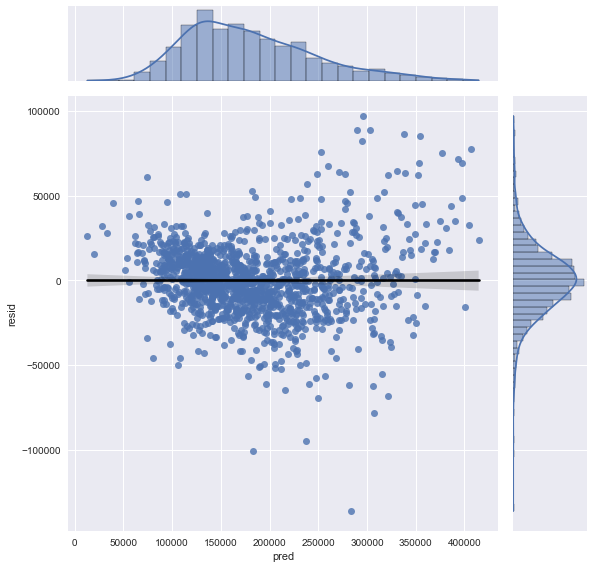

In [37]:
# CodeBlock Section 7c1
# Joint Plot.  
plt.style.use('seaborn')
plt.figure(figsize=(20,8))
sns.jointplot(y='resid', x='pred',kind='reg', data= X, ratio=5, height = 8, line_kws={'color': 'black'})

# Section 7c2

• Create a code block to create a DataFrame named features that includes all of the 
features in the X dataset only (no ‘const’).  Make sure to drop ‘const’. (See Video 
C1.S8.Py05 - Re-run a multiple regression because of multi-collinearity). 

In [38]:
# CodeBlock Section 7c2
features = X
features = features.drop('const', axis = 1)
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 1 to 1460
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Lot Frontage                   1387 non-null   int64  
 1   Lot Area                       1387 non-null   int64  
 2   Overall Quality                1387 non-null   int64  
 3   Overall Cond                   1387 non-null   int64  
 4   Year Built                     1387 non-null   int64  
 5   Masonry/Veneer Area            1387 non-null   int64  
 6   Basement Finished Area         1387 non-null   int64  
 7   Basement Unfinished Area       1387 non-null   int64  
 8   1st Floor Area                 1387 non-null   int64  
 9   2nd Floor Area                 1387 non-null   int64  
 10  Bedrooms Above Grade           1387 non-null   int64  
 11  Total Rooms Above Grade        1387 non-null   int64  
 12  Fireplaces                     1387 non-null   i

# Section 7c3

• Create a code block and create a correlation matrix for the features in the features 
DataFrame.  Name the new correlation matrix corrMatrix. 

In [39]:
# CodeBlock Section 7c3
corrMatrix = features.corr()

# Section 7c4

• Create a code block that converts corrMatrix to a DataFrame and name the new 
DataFrame df_corrMatrix.

In [40]:
# CodeBlock Section 7c4
df_corrMatrix = pd.DataFrame(corrMatrix)
df_corrMatrix.head()

,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,...,dt_2 FAMILY CONVERSION,dt_2-1/2 STORY ALL AGES,dt_2-STORY 1945 & OLDER,dt_2-STORY 1946 & NEWER,dt_2-STORY PUD,dt_DUPLEX,dt_SPLIT FOYER,dt_SPLIT OR MULTI-LEVEL,pred,resid
Lot Frontage,1.000000,0.066948,0.139714,-0.047409,0.021453,0.068354,-0.000469,0.149397,0.187143,0.007172,...,0.018106,0.044041,0.016942,0.046856,-0.212311,0.048754,-0.026362,-0.033133,0.195642,-1.080437e-13
Lot Area,0.066948,1.000000,0.065029,0.000716,-0.005572,0.051788,0.159935,-0.009324,0.251585,0.013684,...,0.077034,0.004964,-0.006383,0.051291,-0.170927,-0.009045,-0.014165,0.009080,0.258233,5.372182e-13
Overall Quality,0.139714,0.065029,1.000000,-0.120603,0.594036,0.382993,0.189307,0.302580,0.439118,0.260637,...,-0.117875,0.023374,-0.007809,0.337349,0.003897,-0.145273,-0.060496,-0.021128,0.845182,4.964293e-14
Overall Cond,-0.047409,0.000716,-0.120603,1.000000,-0.399380,-0.128222,-0.040787,-0.155699,-0.150636,0.023249,...,0.033870,0.051005,0.202879,-0.132902,-0.072503,-0.096751,0.056380,0.061144,-0.108521,2.411423e-14
Year Built,0.021453,-0.005572,0.594036,-0.399380,1.000000,0.299953,0.222474,0.166321,0.264589,0.002766,...,-0.212437,-0.197846,-0.363498,0.385463,0.111339,-0.027603,0.013688,0.011385,0.580342,3.978937e-14


# Section 7c5

• Create a code block that create a heatmap.  It should include: 
o Set the colormap to RdBu.  You can do this with this as the top line of code in 
this code block. 
§ colormap = plt.cm.RdBu 
o Heatmap should include the following: 
§ df_corrMatrix 
§ linewidths is 0.1 
§ vmax is 1.0, vmin= -1.0, #this sets the max and min scale 
§ square=True 
HW05 – Encoding Qualitative Variables and Interaction   
11 
 
§ cmap=colormap #uses the colormap we created for colors 
§ linecolor='white' 
§ annot=False #this does not add the actual correlations into each square – 
there is not enough room.

<AxesSubplot:title={'center':'Heat Map for CorrMatrix'}>

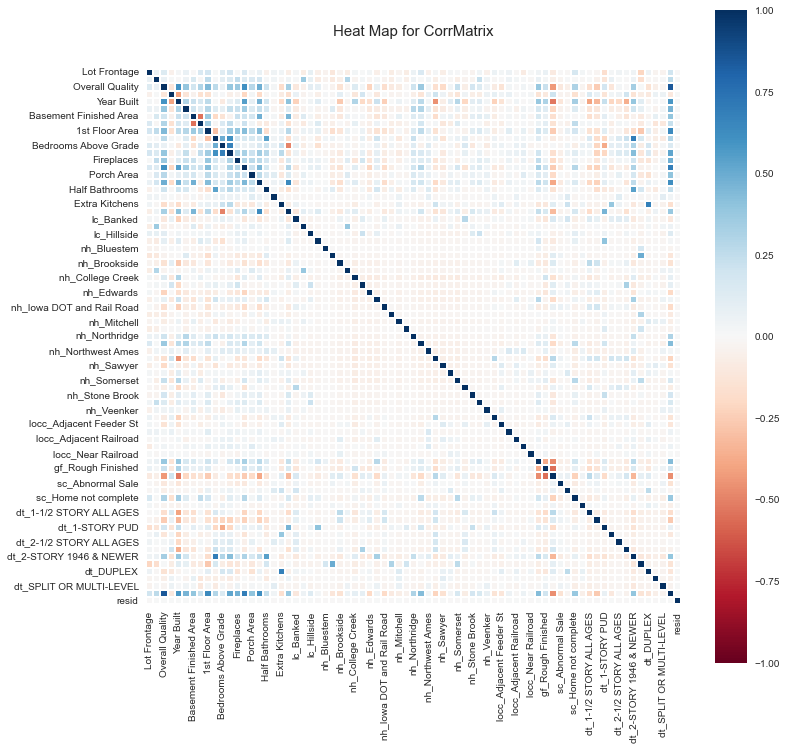

In [41]:
# CodeBlock Section 7c5

colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
plt.title('Heat Map for CorrMatrix', y=1.05, size=15)
sns.heatmap(df_corrMatrix, linewidths=0.1, vmax=1.0, vmin=-1.0, square=True, cmap = colormap, linecolor= 'white', annot= False)

# Section 7c6

• Create a VIF for the features in the multiple regression (See Video C1S8.Py04: 
 Calculating VIF for features in a model). 
o Name the DataFrame vif. 
o vif should include two columns [‘VIF Factor’ and ‘Features’]  
o Sort and show vif by ‘VIF Factor’ and from largest to smallest. 
o Note: Notice that ‘the ‘Garage Finish’ dummy variables have the highest VIF. 

In [42]:
# CodeBlock Section 7c6
# importing variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
# CodeBlock Section 7c6

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
37,inf,nh_Northridge
45,inf,nh_Stone Brook
52,inf,locc_Near Pos Feature
51,inf,locc_Adjacent Railroad
50,inf,locc_Adjacent Pos Feature
49,inf,locc_Adjacent Feeder St
48,inf,locc_Adjacent Arterial St
47,inf,nh_Veenker
44,inf,nh_South & West of Iowa State
54,inf,gf_Finished


# Section 7c7

• Create a code block that drops the Garage Finish features from the X dataset.   
o gf_Rough Finished 
o gf_Unfinished 
o gf_Finished 

In [44]:
# CodeBlock Section 7c7
X = X.drop(['gf_Rough Finished', 'gf_Unfinished', 'gf_Finished'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 1 to 1460
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   const                          1387 non-null   float64
 1   Lot Frontage                   1387 non-null   int64  
 2   Lot Area                       1387 non-null   int64  
 3   Overall Quality                1387 non-null   int64  
 4   Overall Cond                   1387 non-null   int64  
 5   Year Built                     1387 non-null   int64  
 6   Masonry/Veneer Area            1387 non-null   int64  
 7   Basement Finished Area         1387 non-null   int64  
 8   Basement Unfinished Area       1387 non-null   int64  
 9   1st Floor Area                 1387 non-null   int64  
 10  2nd Floor Area                 1387 non-null   int64  
 11  Bedrooms Above Grade           1387 non-null   int64  
 12  Total Rooms Above Grade        1387 non-null   i

# Section 7c8 

• Create a code block and execute a multiple regression using statsmodels (See 
Video C1.S8.Py05 - Re-run a multiple regression because of multi-collinearity). 
Make sure to include the following: 
o Add a constant 
o Use y and X to fit the model and name the model reg. 
o Use X to predict with the model and name it pred. 
o Use the model (reg) to create the residuals and name it resid. 
o Show a summary of the results. 
 
 
 


In [45]:
# CodeBlock Section 7c8  
X = X
y = df_realestate['Sale Price']
X = sm.add_constant(X)

reg = sm.OLS(y, X).fit()
pred = reg.predict(X)
resid = reg.resid
reg.summary()

C:\Users\jju9188\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.415e+29
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:18:08   Log-Likelihood:                 27421.
No. Observations:                1387   AIC:                        -5.470e+04
Df Residuals:                    1316   BIC:                        -5.433e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1.397e-09   5.81e-09     -0.240      0.810   -1.28e-08       1e-08
Lot Frontage                  -1.194e-12   5.84e-13     -2.044      0.041   -2.34e-12   -4.82e-14
Lot Area                       4.441e-16   3.27e-15      0.136      0.892   -5.97e-15    6.86e-15
Overall Quality               -3.638e-12   6.56e-11     -0.055      0.956   -1.32e-10    1.25e-10
Overall Cond                   1.728e-11   3.56e-11      0.485      0.628   -5.26e-11    8.72e-11
Year Built                     5.684e-13   2.84e-12      0.200      0.841      -5e-12    6.14e-12
Masonry/Veneer Area            4.974e-14   1.45e-13      0.344      0.731   -2.34e-13    3.34e-13
Basement Finished Area         6.395e-14   1.57e-13      0.406      0.685   -2.45e-13    3.73e-13
Basement Unfinished Area       8.948e-14   8.37e-14      1.069      0.285   -7.47e-14    2.54e-13
1st Floor Area                 4.974e-14   3.44e-13      0.145      0.885   -6.24e-13    7.24e-13
2nd Floor Area                 1.776e-13   3.09e-13      0.575      0.566   -4.29e-13    7.84e-13
Bedrooms Above Grade          -2.001e-11   5.59e-11     -0.358      0.720    -1.3e-10    8.97e-11
Total Rooms Above Grade                0   2.65e-11          0      1.000    -5.2e-11     5.2e-11
Fireplaces                    -8.185e-12   3.67e-11     -0.223      0.823   -8.02e-11    6.38e-11
Garage Cars                    1.137e-11   4.84e-11      0.235      0.815   -8.37e-11    1.06e-10
Porch Area                     8.882e-14    1.8e-13      0.493      0.622   -2.65e-13    4.42e-13
Full Bathrooms                -9.095e-12   5.65e-11     -0.161      0.872    -1.2e-10    1.02e-10
Half Bathrooms                 3.638e-12   4.66e-11      0.078      0.938   -8.79e-11    9.51e-11
Pool                            2.91e-11   3.14e-10      0.093      0.926   -5.86e-10    6.45e-10
Extra Kitchens                 1.819e-11   1.78e-10      0.102      0.919   -3.31e-10    3.67e-10
Baths per Bedroom              -2.91e-11   1.07e-10     -0.271      0.786   -2.39e-10    1.81e-10
lc_Banked                      1.819e-11   9.75e-11      0.187      0.852   -1.73e-10    2.09e-10
lc_Depression                 -1.273e-11   1.34e-10     -0.095      0.924   -2.75e-10     2.5e-10
lc_Hillside                   -1.819e-11   1.21e-10     -0.150      0.881   -2.56e-10     2.2e-10
nh_Bloomington Heights         7.276e-12   2.05e-10      0.035      0.972   -3.95e-10    4.09e-10
nh_Bluestem                   -8.004e-11   4.85e-10     -0.165      0.869   -1.03e-09    8.71e-10
nh_Briardale                  -1.455e-11   2.24e-10     -0.065      0.948   -4.54e-10    4.25e-10
nh_Brookside                   2.183e-11   1.44e-10      0.152      0.879    -2.6e-10    3.04e-10
nh_Clear Creek                -3.183e-11   1.

# Section 7c9

Create the Variance Inflation Factor (VIF) for the new model 
• Create a VIF for the features in the new multiple regression model.

In [46]:
# CodeBlock Section 7c9
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,112732.9,const
69,413.5,pred
10,58.8,2nd Floor Area
9,52.8,1st Floor Area
3,25.7,Overall Quality
5,23.8,Year Built
7,14.9,Basement Finished Area
38,11.3,nh_Northridge Heights
65,9.9,dt_2-STORY PUD
64,7.8,dt_2-STORY 1946 & NEWER


# 7c10-Explanation of the Results of the new Multiple Regression 
Looking at the results (specifically the R-squared) is there much difference in the 
strength of relationship between the original multiple regression (Section 7b) and the 
new multiple regression model (Section 7d)? 

On the original model the R squared is 0.911 and the adjusted R square is 0.906. The new model shows the R squared and adjusted R squared to be 1.000, which means it’s a strong model. However, we need analyze the residuals to evaluate that the distribution is normal. 

 Looking at the new VIF, is there any multi-
collinearity?

There are some high VIF variables in the model that are higher than 10 would indicate multi- collinearity is present. 
The following variables have VIF values greater than 10:
pred (413.5), 2nd floor Area (58.8), 1st floor area (52.8), overall quality (25.7), year built (23.8), basement finished area (14.9) and nh_northridge heights (11.3). They would have to be removed from the model to evaluate the R squared and Adjusted R squared. 

What do you think of this model?

All the variables in this model have p values that are greater than 0.05 which means they are not significant explaining the target variable (sale price). Consequently, there is a need to drop predictor variables suspected with multi-collinearity listed in VIF question above and reevaluate the model. 


# 8. Summary and Explanation of All Steps 
o Explain the rationale for encoding features. 
The rationale for encoding features is to be able to measure them with quantitative values so that they can be used in the regression model. 
o What is the relationship between the features and target variable in the original 
model?

The R squared is 0.911 and the adjusted R square is 0.906, which indicates high valid correlation between the target variable and feature variables. However, there were concerns about multi collinearity and the residual distribution to fully validate the validity of the model. 
§ Indicate measures that explain relationship.
The R squared is 0.911 and the adjusted R square is 0.906, which are close to 1.000 indicating high correlation between the target and feature variables.  
o What do the plots and VIF help you assess?  
The VIF values help asses if there is a multi-collinearity which indicate a false relationship of high correlation. VIF vales that are greater than 10 are considered multi-collinearity. In addition, the plots of the residuals are not showing a normal distribution, which indicates a violation a basic assumption in the regression model. 

o What is the relationship between the features and target variable in the new 
model? 

On the new model, the R squared is 1.000 and the adjusted R square is 1.000. However p values for all feature variables are greater than 0.050, which indicates they are not significant predicting the target variable (sale price). In addition, the following variables have VIF values greater than 10:
pred (413.5), 2nd floor Area (58.8), 1st floor area (52.8), overall quality (25.7), year built (23.8), basement finished area (14.9) and nh_northridge heights (11.3), which indicates multi collinearity and should be removed from the model.

§ Indicate measures that explain relationship.

The p values in the second model are greater than 0.050, which indicates they are not significant predicting the value of the target variable. 
§ Is it just as good as the original model? 

No, it seems to be worse since all variables in the second model are not significant and there are issues with multi collinearity and residual distribution.

o Include a summary of the practical implications of the results, what does it mean 
in real terms? 

It means the model needs to be adjusted by removing the variables that have multi collinearity and reevaluating the results for R squared and adjusted R squared. In addition,   validate the multi collinearity and residual distribution. 
